In [59]:
import pandas as pd
import matplotlib.dates as mdates
df = pd.read_csv("Sales.csv", encoding = 'cp1252')
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
542,2615,CA-2014-147298,4/26/2014,5/3/2014,Standard Class,AG-10300,Aleksandra Gannaway,Corporate,United States,Los Angeles,...,90049,West,FUR-CH-10004886,Furniture,Chairs,Bevis Steel Folding Chairs,230.280,3,0.2,23.0280
1335,6378,US-2016-116442,12/15/2016,12/22/2016,Standard Class,BP-11230,Benjamin Patterson,Consumer,United States,Los Angeles,...,90004,West,FUR-FU-10002364,Furniture,Furnishings,"Eldon Expressions Wood Desk Accessories, Oak",14.760,2,0.0,4.2804
1995,9402,CA-2014-159814,6/24/2014,6/28/2014,Standard Class,LP-17080,Liz Pelletier,Consumer,United States,Tucson,...,85705,West,FUR-FU-10001731,Furniture,Furnishings,Acrylic Self-Standing Desk Frames,4.272,2,0.2,0.9612
757,3615,CA-2017-112529,11/19/2017,11/21/2017,First Class,SC-20770,Stewart Carmichael,Corporate,United States,San Antonio,...,78207,Central,FUR-TA-10002622,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",718.116,6,0.3,-71.8116
1539,7334,CA-2015-125563,4/11/2015,4/17/2015,Standard Class,PR-18880,Patrick Ryan,Consumer,United States,Tampa,...,33614,South,FUR-FU-10001290,Furniture,Furnishings,Executive Impressions Supervisor Wall Clock,67.360,2,0.2,10.1040


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [61]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [62]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [63]:
df.columns = df.columns.str.replace(' ','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         2121 non-null   int64  
 1   Order_ID       2121 non-null   object 
 2   Order_Date     2121 non-null   object 
 3   Ship_Date      2121 non-null   object 
 4   Ship_Mode      2121 non-null   object 
 5   Customer_ID    2121 non-null   object 
 6   Customer_Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal_Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product_ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product_Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [106]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"],dayfirst=True)
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"],dayfirst=True)

In [107]:
df["Leadtime"] = df["Ship_Date"] - df["Order_Date"]



In [76]:
df["Month"] = pd.DatetimeIndex(df["Order_Date"]).month
df["Year"] = pd.DatetimeIndex(df["Order_Date"]).year

In [77]:
df.groupby("Year")["Sales"].sum()

Year
2014    157192.8531
2015    170518.2370
2016    198901.4360
2017    215387.2692
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Trend of Total sales per year')

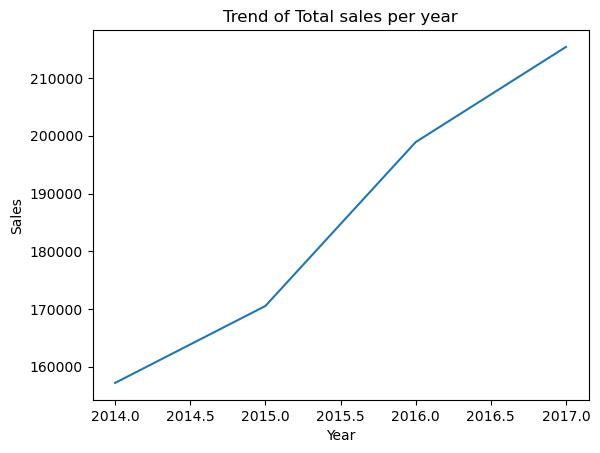

In [78]:
import matplotlib.pyplot as plt
df.groupby("Year")["Sales"].sum().plot()
plt.ylabel("Sales")
plt.title("Trend of Total sales per year")

In [79]:
df.groupby("Month")["Sales"].mean()

Month
1     389.743723
2     250.252705
3     362.630541
4     294.917272
5     322.434205
6     365.513540
7     301.079341
8     361.968105
9     377.236137
10    310.628426
11    380.207050
12    371.396242
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Average Sales for each month')

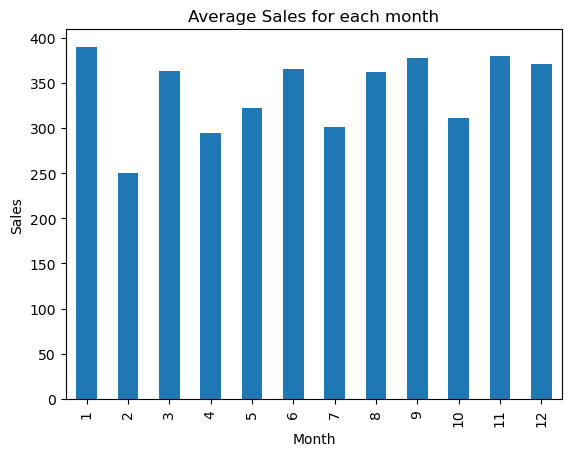

In [80]:
df.groupby("Month")["Sales"].mean().plot.bar()
plt.ylabel("Sales")
plt.title("Average Sales for each month")

In [81]:
df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

State
California      156064.6015
New York         93372.7290
Texas            60593.2918
Washington       48020.1520
Pennsylvania     39354.9310
Illinois         28274.5220
Virginia         25321.9500
Ohio             24199.1450
Florida          22987.0380
Michigan         22321.1000
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Top 10 States in terms of Sales')

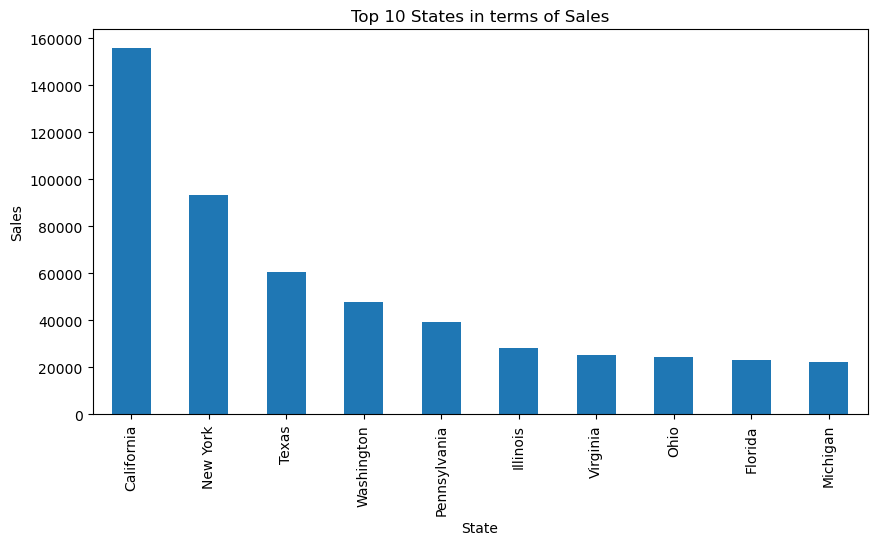

In [82]:
plt.figure(figsize=(10,5))
df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Sales")
plt.title("Top 10 States in terms of Sales")

In [83]:
df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

City
New York City    75691.0490
Los Angeles      54000.0410
Seattle          40995.8780
Philadelphia     36495.5410
San Francisco    36357.3080
Houston          23183.2144
San Diego        20031.2370
Detroit          16364.0100
Chicago          12495.2220
Springfield      12046.1980
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Top 10 Cities in terms of Sales')

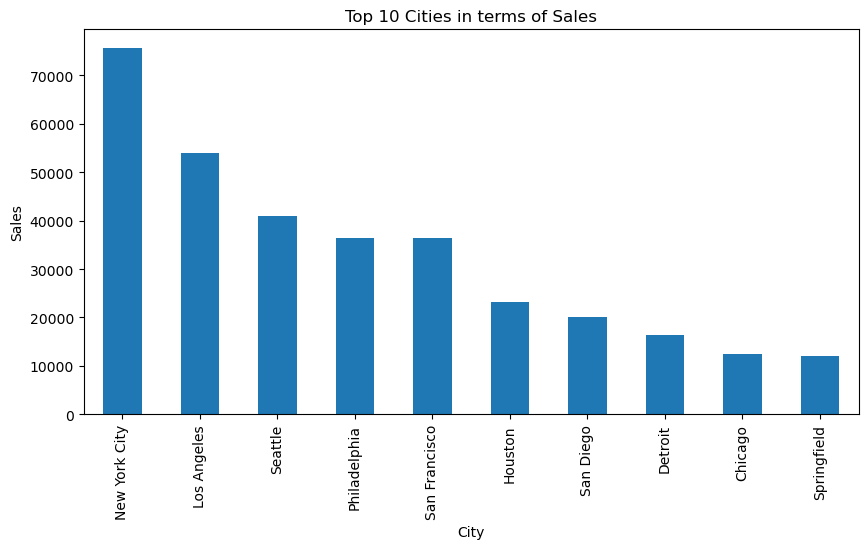

In [84]:
plt.figure(figsize=(10,5))
df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Sales")
plt.title("Top 10 Cities in terms of Sales")

In [85]:
df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

Category
Furniture    741999.7953
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Total Sales per Sub-category')

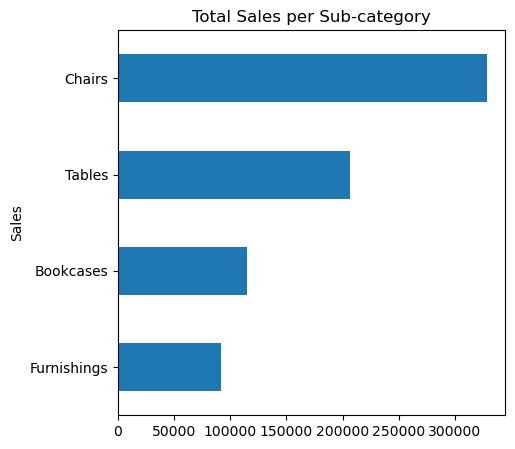

In [87]:
plt.figure(figsize=(5,5))
df.groupby("Sub-Category")["Sales"].sum().sort_values().plot.barh()
plt.ylabel("Sales")
plt.title("Total Sales per Sub-category")

In [88]:
df.groupby(["State","City"])["Sales"].sum().sort_values(ascending=False)

State         City          
New York      New York City     75691.049
California    Los Angeles       54000.041
Washington    Seattle           40995.878
Pennsylvania  Philadelphia      36495.541
California    San Francisco     36357.308
                                  ...    
Texas         Beaumont              8.624
              Garland               8.544
Ohio          Cuyahoga Falls        8.352
Texas         Mesquite              6.368
Washington    Auburn                4.180
Name: Sales, Length: 427, dtype: float64

In [89]:
df.groupby("Segment")["Sales"].sum().sort_values(ascending=False)


Segment
Consumer       391049.3120
Corporate      229019.7858
Home Office    121930.6975
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Total Sales per Segment')

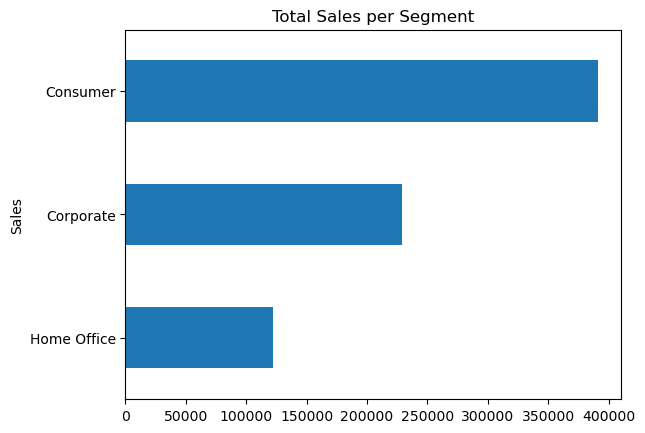

In [90]:
df.groupby("Segment")["Sales"].sum().sort_values().plot.barh()
plt.ylabel("Sales")
plt.title("Total Sales per Segment")

In [91]:
df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

Region
West       252612.7435
East       208291.2040
Central    163797.1638
South      117298.6840
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Total Sales per Region')

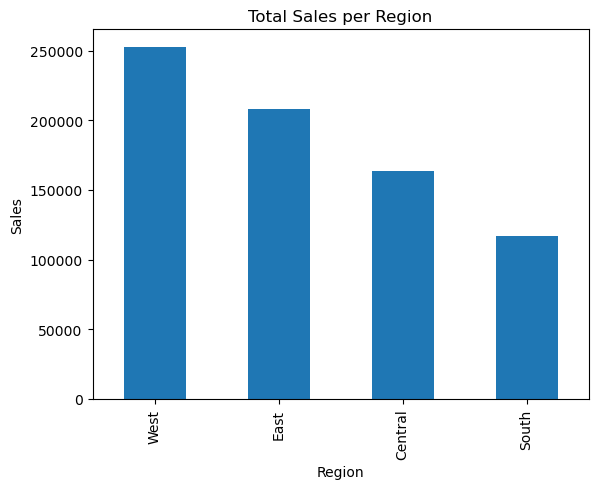

In [92]:
df.groupby("Region")["Sales"].sum().sort_values(ascending=False).plot.bar()
plt.ylabel("Sales")
plt.title("Total Sales per Region")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Row_ID         2121 non-null   int64          
 1   Order_ID       2121 non-null   object         
 2   Order_Date     2121 non-null   datetime64[ns] 
 3   Ship_Date      2121 non-null   datetime64[ns] 
 4   Ship_Mode      2121 non-null   object         
 5   Customer_ID    2121 non-null   object         
 6   Customer_Name  2121 non-null   object         
 7   Segment        2121 non-null   object         
 8   Country        2121 non-null   object         
 9   City           2121 non-null   object         
 10  State          2121 non-null   object         
 11  Postal_Code    2121 non-null   int64          
 12  Region         2121 non-null   object         
 13  Product_ID     2121 non-null   object         
 14  Category       2121 non-null   object         
 15  Sub-

In [108]:

df["Leadtime"].dt.days.describe()

count    2121.000000
mean        3.917020
std         1.755234
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Leadtime, dtype: float64

Text(0.5, 1.0, 'Leadtime histogram')

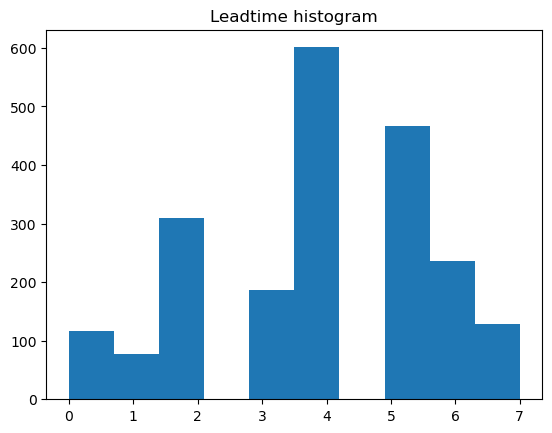

In [110]:
plt.hist(df["Leadtime"].dt.days)
plt.title("Leadtime histogram")

In [111]:
df["Year_Month"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)

In [112]:
df["Year_Month"] = pd.to_datetime(df["Year_Month"]).dt.date

Text(0.5, 1.0, 'Sales Trend by Year-Month')

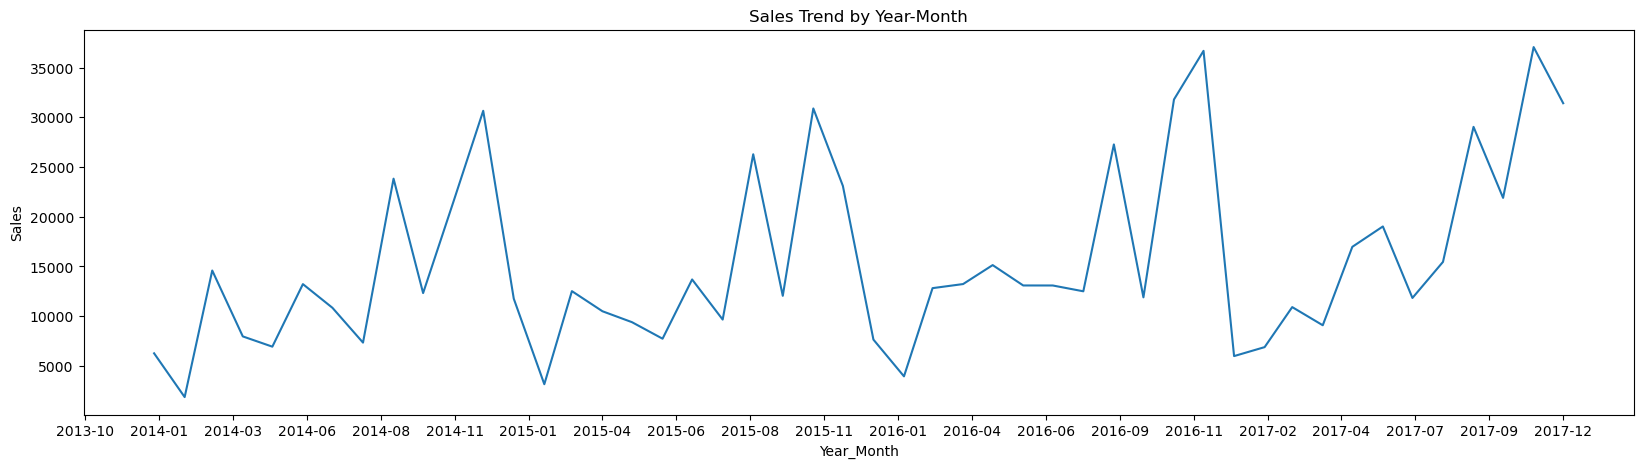

In [113]:
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
df.groupby("Year_Month")["Sales"].sum().plot()
plt.ylabel("Sales")
plt.title("Sales Trend by Year-Month")

In [115]:
sales_trend = df[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_trend = sales_trend.sort_values(by="Year_Month")
sales_trend.head()

,Sales
Year_Month,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


In [116]:
sales_trend["rolmean"] = sales_trend.rolling(window=5).mean()
sales_trend.head()

,Sales,rolmean
Year_Month,,
2014-01-01,6242.525,NaN
2014-02-01,1839.658,NaN
2014-03-01,14573.956,NaN
2014-04-01,7944.837,NaN
2014-05-01,6912.787,7502.7526


Text(0.5, 1.0, 'Sales Trend by Year-Month with Rolling Average')

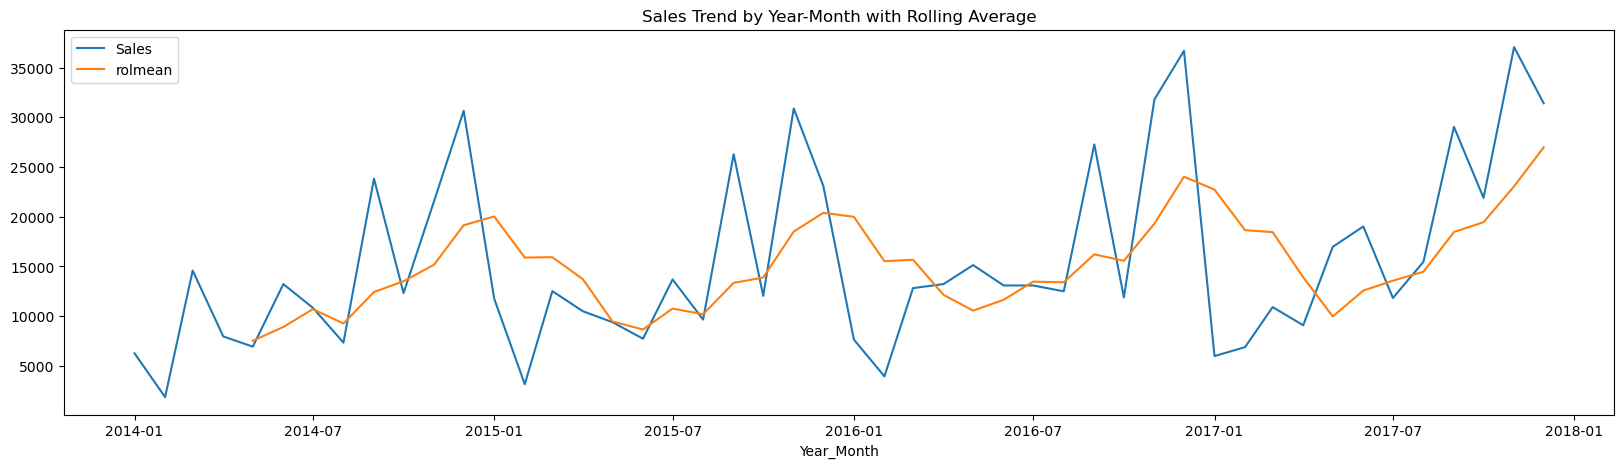

In [117]:
sales_trend.plot(figsize=(20,5))
plt.legend()
plt.title("Sales Trend by Year-Month with Rolling Average")

In [118]:
sales_data = df[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_data = sales_data.sort_values(by="Year_Month")
sales_data.head()

,Sales
Year_Month,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


In [119]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(sales_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.699026
p-value: 0.000085
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


<Axes: xlabel='Year_Month'>

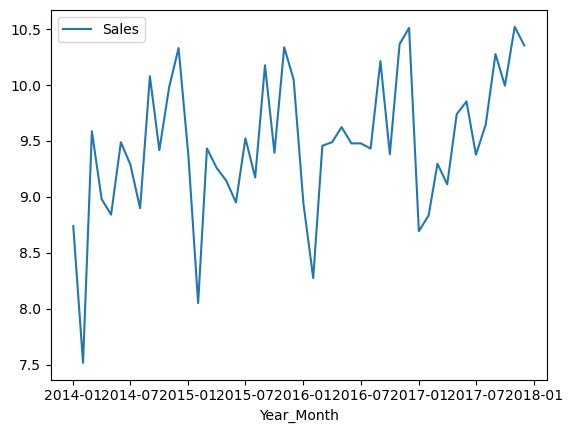

In [121]:
import numpy as np
sales_data_log = np.log(sales_data)
sales_data_log.plot()

In [122]:
result = adfuller(sales_data_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.356967
p-value: 0.602724
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


<Axes: xlabel='Year_Month'>

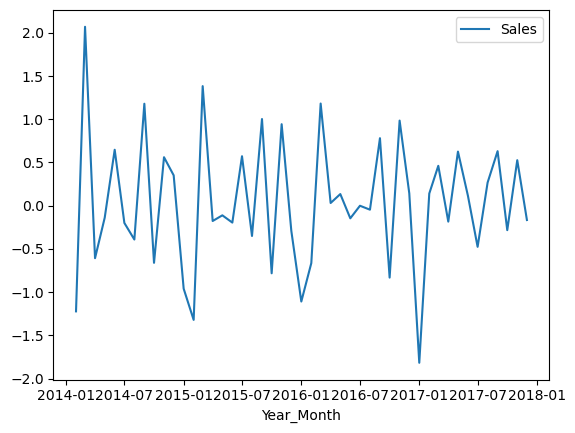

In [123]:
sales_shift = sales_data_log - sales_data_log.shift()
sales_shift.plot()

In [124]:
result = adfuller(sales_shift.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.673713
p-value: 0.000000
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

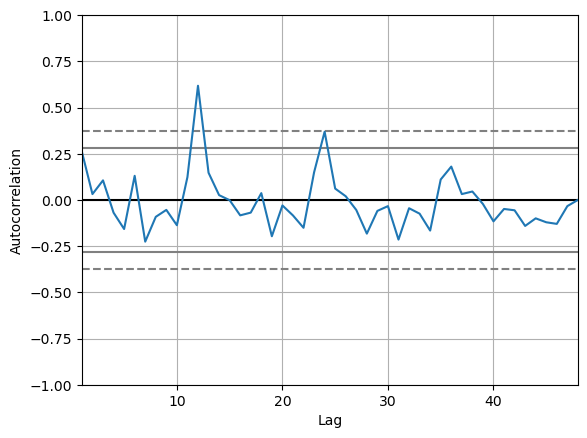

In [125]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales_data_log)

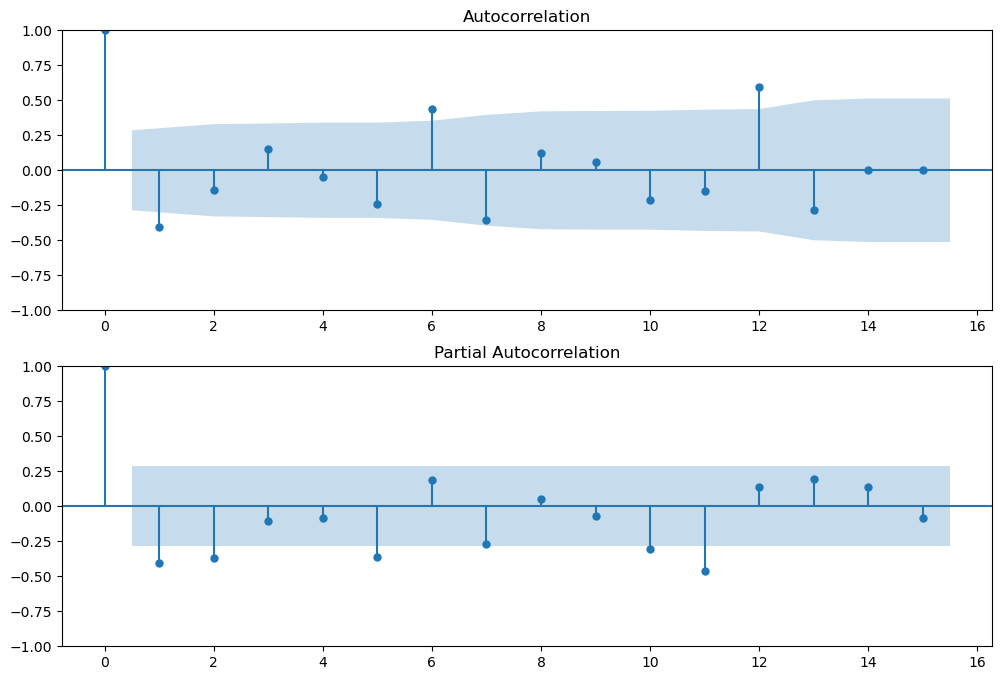

In [126]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_shift.dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_shift.dropna(),lags=15,ax=ax2)

In [127]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(sales_shift,order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\Kaushik D\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaushik D\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaushik D\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -58.910
Date:                Fri, 23 Feb 2024   AIC                            123.819
Time:                        13:00:15   BIC                            129.370
Sample:                    01-01-2014   HQIC                           125.908
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4087      0.133     -3.074      0.002      -0.669      -0.148
ma.L1         -0.9996     24.600     -0.041      0.968     -49.215      47.216
sigma2         0.4873     11.946      0.041      0.967     -22.927      23.901
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.58   Prob(JB):                         0.25
Heteroskedasticity (H):               0.63   Skew:                            -0.45
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Kaushik D\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaushik D\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Year_Month'>

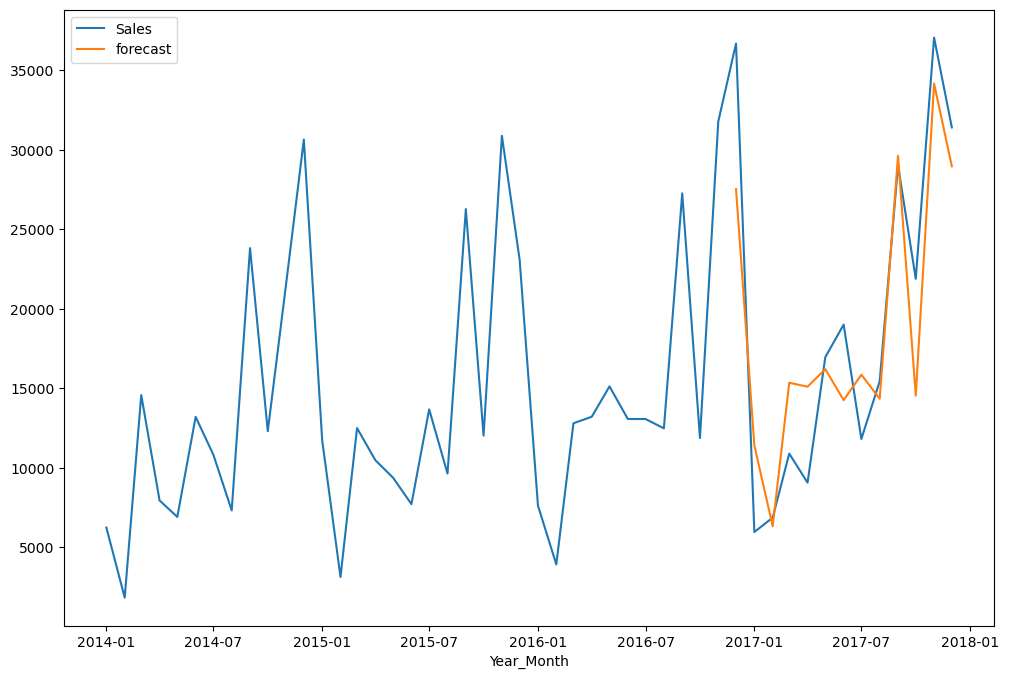

In [129]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales_data['Sales'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()
sales_data['forecast']=results.predict(start=35,end=50,dynamic=True)
sales_data[['Sales','forecast']].plot(figsize=(12,8))

<Axes: >

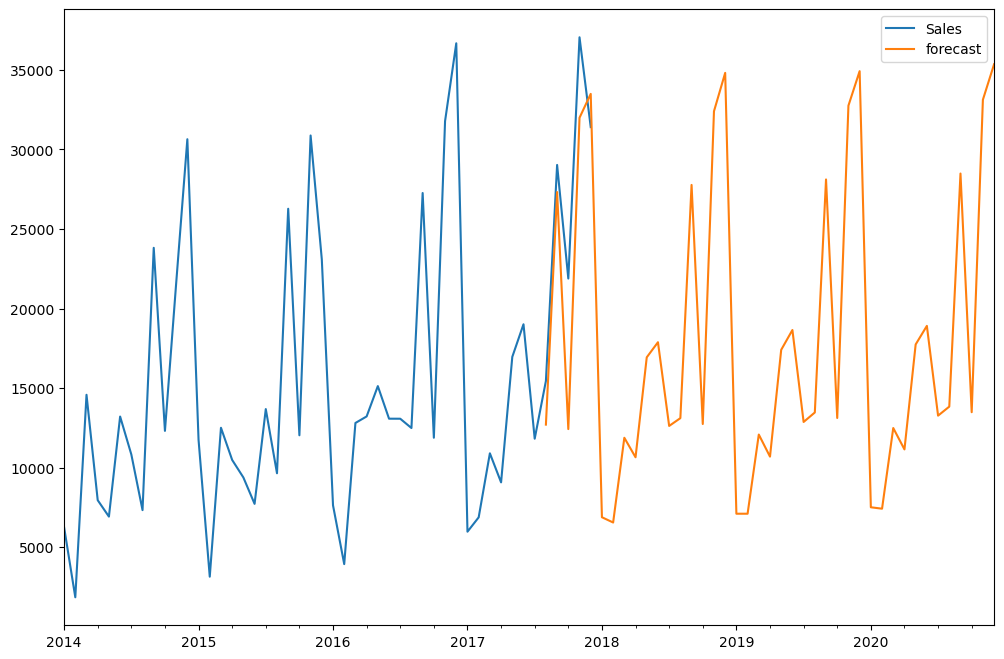

In [136]:
from pandas.tseries.offsets import DateOffset
import pandas as pd

future_dates = [sales_data.index[-1] + DateOffset(months=x) for x in range(1, 37)]
future_dates_df = pd.DataFrame(index=future_dates, columns=sales_data.columns)

future_df = pd.concat([sales_data, future_dates_df])

# Convert future_df index to Timestamp
future_df.index = pd.to_datetime(future_df.index)

future_df['forecast'] = results.predict(start=43, end=200, dynamic=True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))